# 特征工程

In [8]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [9]:
# 读取处理好缺失值的数据
testfile = "data/used_car_testB_fillna_0406.csv"
trainfile = 'data/used_car_train_fillna_0406.csv'

train_df = pd.read_csv(trainfile, sep=',', index_col=0)
test_df = pd.read_csv(testfile, sep=',', index_col=0)
train_df.head()

# 拆分特征和标签
feature_names = train_df.columns
label_columns = ['price']
feature_names = np.setdiff1d(train_df.columns, label_columns)

x_train_df = train_df[feature_names]
y_train_df = train_df[label_columns]
x_test_df = test_df[feature_names]

# 拼接全集特征
feature_df = pd.concat([x_train_df, x_test_df], axis = 0)
feature_df.head()

,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,power,regDate,regionCode,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9
SaleID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,6,20160404,0.0,0.0,12.5,30.0,736,0,60,20040402,1046,43.357796,3.966344,-2.881803,2.804097,-2.420821,0.795292,0.914762,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462
1,2.0,1,20160309,0.0,0.0,15.0,40.0,2262,2,0,20030301,4366,45.305273,5.236112,-4.900482,2.096338,-1.030483,-1.722674,0.245522,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582
2,1.0,15,20160402,0.0,0.0,12.5,115.0,14874,0,163,20040403,2806,45.978359,4.823792,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075
3,0.0,10,20160312,0.0,1.0,15.0,109.0,71865,0,193,19960908,434,45.687478,4.492574,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000
4,1.0,5,20160313,0.0,0.0,5.0,110.0,111080,0,68,20120103,6977,44.383511,2.031433,-1.896240,0.910783,0.931110,2.834518,1.923482,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534


In [27]:
feature_df.describe()

,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,power,regDate,regionCode,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,nunique_regionCode
count,199999.000000,199999.000000,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,1.769803,8.061190,2.016033e+07,0.370330,0.223656,12.597488,47.259136,68387.879469,0.419042,119.428797,2.003413e+07,2582.583908,44.404723,-0.049978,0.004150,0.007482,0.004691,0.001321,-0.002362,0.080518,0.078757,0.018962,0.248190,0.044849,0.124693,0.058157,0.062024,54.169946
std,1.740435,7.873392,1.079030e+02,0.538651,0.412766,3.917741,49.629530,61085.718853,0.753246,184.885833,5.361589e+04,1886.333716,2.458132,3.640586,3.770324,3.286928,2.517086,1.288300,1.040020,2.929910,2.024605,1.193704,0.045812,0.051723,0.201417,0.029181,0.035698,43.070155
min,0.000000,0.000000,2.014031e+07,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.991000e+07,0.000000,30.451976,-4.295589,-9.168192,-5.662163,-9.639552,-4.157649,-6.546556,-4.470671,-5.817029,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,2.016031e+07,0.000000,0.000000,12.500000,11.000000,11195.000000,0.000000,75.000000,1.999100e+07,1015.000000,43.132391,-3.192512,-3.709323,-1.954429,-1.870338,-1.055398,-0.437968,-0.969802,-1.461144,-0.921422,0.243571,0.000038,0.062480,0.035352,0.033917,25.000000
50%,1.000000,6.000000,2.016032e+07,0.000000,0.000000,15.000000,30.000000,51784.000000,0.000000,110.000000,2.003091e+07,2197.000000,44.607791,-3.052911,1.626030,-0.362377,-0.133465,-0.036274,0.140290,-0.383339,0.103370,-0.074214,0.257804,0.000809,0.095869,0.056967,0.058564,47.000000
75%,3.000000,13.000000,2.016033e+07,1.000000,0.000000,15.000000,66.000000,118811.500000,1.000000,150.000000,2.007111e+07,3843.000000,46.000776,3.995178,2.844747,1.256956,1.776759,0.943060,0.681633,0.241031,1.565212,0.869312,0.265291,0.101930,0.125310,0.079385,0.087519,73.000000
max,7.000000,39.000000,2.016041e+07,6.000000,1.000000,15.000000,247.000000,196812.000000,2.000000,19312.000000,2.015121e+07,8120.000000,52.304178,7.320308,12.357011,18.819042,13.847792,5.635374,2.743993,19.035496,9.854702,4.959106,0.291838,0.153403,1.411559,0.160791,0.213617,489.000000


power 特征应该在[0,600]区间内, 但实际有超过600的, 我们将大于600的标记到600

In [29]:
feature_df.loc[feature_df['power']>600, 'power'] = 600

(array([  2441.,    986.,   3121.,   3339.,   3610.,   4254.,   4951.,
          5469.,   6103.,   6941.,   8629.,      0.,  21035.,      0.,
        129120.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <BarContainer object of 15 artists>)

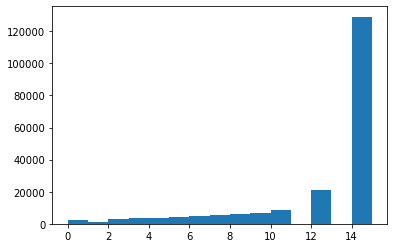

In [31]:
import matplotlib.pyplot as plt
plt.hist(feature_df['kilometer'], bins=np.linspace(0, 15, 16))

## 类别特征处理
- 无序类别特征: bodyType(nunique=7), brand(nunique=40), fuelType, gearbox, model(nunique=248), name, notRepairedDamage, regionCode
- 有序类别特征: kilometer

### 单特征处理
1. regionCode 属于基数(cardinality)高的类别特征, 有8000+个基数. </br>
   处理方式: 统计频数, 作为新特征nunique_regionCode. 
2. model 也属于基数高的类别特征, 有248个基数. </br>
   处理方式: 

In [25]:
feature_df['nunique_regionCode'] = feature_df.groupby('regionCode')['regionCode'].transform('count')


### 构建组合特征

#### 拼接特征
1. bodyType + fuelType: 汽车类型+燃油类型, OneHot之后得到 8*7 维特征
2. bodyType + gearbox: 汽车类型+变速箱, OneHot之后得到 8*2 维特征
3. brand 

In [54]:
from sklearn.preprocessing import OneHotEncoder
# bodyType+fuelType
bodyType_fuelType = feature_df['bodyType'].astype(int).astype(str) + feature_df['fuelType'].astype(int).astype(str)
ohe = OneHotEncoder(sparse=False)
bodyType_fuelType_onehot = ohe.fit_transform(pd.DataFrame(bodyType_fuelType))
col_names = [f'bodyType_fuelType_{i}' for i in range(bodyType_fuelType.nunique())]
feature_df[col_names] = bodyType_fuelType_onehot


In [58]:
# bodyType+gearbox
bodyType_gearbox = feature_df['bodyType'].astype(int).astype(str) + feature_df['gearbox'].astype(int).astype(str)
ohe = OneHotEncoder(sparse=False)
bodyType_gearbox_onehot = ohe.fit_transform(pd.DataFrame(bodyType_gearbox))
col_names = [f'bodyType_gearType_{i}' for i in range(bodyType_gearbox.nunique())]
feature_df[col_names] = bodyType_gearbox_onehot

## 训练模型

### 交叉验证划分

In [64]:
# 获得训练测试集
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
import joblib
# 划分区间
marks = np.zeros_like(y_train_df)
marks[(y_train_df > 2500) & (y_train_df <= 7500)] = 1
marks[(y_train_df > 7500) & (y_train_df <= 17500)] = 2
marks[(y_train_df > 17500) & (y_train_df <= 37500)] = 3
marks[y_train_df > 37500] = 4

# 查看各个区间样本的数量
print(np.unique(marks, return_counts=True))

# # 交叉验证划分
# rskf = RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=666)
# cv = [(t,v) for (t,v) in rskf.split(x_train_df, marks)]

# 直接读取cv缓存文件
with open("./cache/cv.pkl", 'rb') as handle:
    cv = joblib.load(handle)


(array([0, 1, 2, 3, 4], dtype=int64), array([64523, 47487, 28044,  8756,  1189], dtype=int64))


### 训练测试集分割

In [61]:
index_trainset = x_train_df.index
x_train = feature_df.iloc[:len(index_trainset), :]
y_train = y_train_df
print((f"训练集shape: {np.shape(x_train)}"))


训练集shape: (149999, 98)


### 一些支持函数

In [60]:
from lightgbm import LGBMRegressor


def fit_lgbm(x_train, y_train, x_val=None, y_val=None):
    params = {'learning_rate': 0.1,
              'n_estimators': 10000,
              'early_stopping_round': 50,
              'verbose': -1, }
    model = LGBMRegressor(**params)
    if x_val is not None and y_val is not None:
        model.fit(x_train, y_train, eval_set=(x_val, y_val), verbose=-1)
    else:
        model.fit(x_train, y_train)
    return model


### 训练

In [80]:
import warnings
from fusion import train_predict_pipeline
warnings.filterwarnings('ignore')


In [65]:
mae, y_pred_val, model_list = train_predict_pipeline(x_train, y_train_df, cv, fit_lgbm)

elapsed time:	48.72
mae:	552.6164


In [78]:
# 挑出与标签高度相关的特征，且不增加新特征，训练lgbm, mse: 630+
# 使用原始特征， 训练lgbm， mse: 548
from scipy.stats import pearsonr
corr_label = []
for column_name in train_df.columns:
    corr_label.append(
        list(pearsonr(np.squeeze(y_train_df), train_df[column_name])))
corr_label_df = pd.DataFrame(
    corr_label, index=train_df.columns, columns=['pcc', 'p-value'])
high_corr_col_names = corr_label_df.loc[corr_label_df.abs()['pcc']>0.0].index
if 'price' in high_corr_col_names:
    high_corr_col_names = np.setdiff1d(high_corr_col_names, ['price'])
mae, y_pred_val, model_list = train_predict_pipeline(x_train[high_corr_col_names], y_train_df, cv, fit_lgbm)


elapsed time:	45.64
mae:	548.8696
